In [213]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


In [214]:
#importation des données
df=pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

In [215]:
df.head(30)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [216]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [217]:
df.shape

(614, 13)

In [218]:
# Voir les valeurs manquante 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [219]:
# Compter les valeurs nulles dans chaque colonne et trier les résultats de manière décroissante
null_counts = df.isnull().sum().sort_values(ascending=False)

# Afficher les résultats
print(null_counts)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64


In [220]:
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [221]:
# diviser les données en deux
cat_data=[]
num_data=[]

for i,c in enumerate(df.dtypes):
    if c==object:
        cat_data.append(df.iloc[:,i])
    else:
        num_data.append(df.iloc[:,i])
        
cat_data=pd.DataFrame(cat_data).transpose()
num_data=pd.DataFrame(num_data).transpose()

In [222]:
cat_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [223]:
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,NaN,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0


In [224]:
# Pour les valeurs catégorical on remplace avec les valeurs qui se fréquente le plus 

cat_data=cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [225]:
cat_data.isnull().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [226]:
# pour bien comprend le role de value_counts

cat_data['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [227]:
# Pour les variables numérique on remplace les valeurs manquante par la valeur voisine de la meme colonne

num_data.fillna(method='bfill',inplace=True)

#method bfill la valeurs d'avant de cette valeurs null


In [228]:
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,128.0,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0


In [229]:
#Transformer Loan_Status(Target)  par des valeurs numérique 

target_value={'Y':1,'N':0}
target=cat_data['Loan_Status']
cat_data.drop('Loan_Status',axis=1,inplace=True)

In [230]:
target=target.map(target_value)

In [231]:
target

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [232]:
le=LabelEncoder()
for i in cat_data:
    cat_data[i]=le.fit_transform(cat_data[i])
cat_data    

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0,1,0,0,0,0,2
1,1,1,1,1,0,0,0
2,2,1,1,0,0,1,2
3,3,1,1,0,1,0,2
4,4,1,0,0,0,0,2
...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0
610,610,1,1,3,0,0,0
611,611,1,1,1,0,0,2
612,612,1,1,2,0,0,2


In [233]:
#supprimer la colone de loan_Id
cat_data.drop('Loan_ID',axis=1,inplace=True)

In [234]:
#concatener les données 

X=pd.concat([cat_data,num_data],axis=1)
Y=target

In [235]:
X

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,2,5849.0,0.0,128.0,360.0,1.0
1,1,1,1,0,0,0,4583.0,1508.0,128.0,360.0,1.0
2,1,1,0,0,1,2,3000.0,0.0,66.0,360.0,1.0
3,1,1,0,1,0,2,2583.0,2358.0,120.0,360.0,1.0
4,1,0,0,0,0,2,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,2900.0,0.0,71.0,360.0,1.0
610,1,1,3,0,0,0,4106.0,0.0,40.0,180.0,1.0
611,1,1,1,0,0,2,8072.0,240.0,253.0,360.0,1.0
612,1,1,2,0,0,2,7583.0,0.0,187.0,360.0,1.0


In [236]:
Y

#réponse de la banque

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

# Analyser les données 

In [237]:
X.corr(method='pearson', min_periods=1)

# analyse:
# correlation entre "ApplicantIncome" et "LoanAmount" montre une corrélation 
# positive significative entre ces deux variables. Cela signifie que 
# les personnes ayant un revenu élevé ont tendance à emprunter 
# des montants plus importants."""

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,-0.025752,0.058809,0.082912,0.116791,-0.074030,0.015104
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.004257,0.051708,0.075948,0.140653,-0.100912,0.003285
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,-0.000244,0.118202,0.030430,0.156092,-0.103864,-0.052246
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.065243,-0.140760,-0.062290,-0.169242,-0.073928,-0.095467
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,-0.030860,0.127180,-0.016100,0.114256,-0.033739,-0.000599
Property_Area,-0.025752,0.004257,-0.000244,-0.065243,-0.030860,1.000000,-0.009500,0.010522,-0.045023,-0.076120,-0.002080
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,-0.009500,1.000000,-0.116605,0.555732,-0.046531,-0.006915
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,0.010522,-0.116605,1.000000,0.190020,-0.059383,0.021598
LoanAmount,0.116791,0.140653,0.156092,-0.169242,0.114256,-0.045023,0.555732,0.190020,1.000000,0.038747,0.015444
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.076120,-0.046531,-0.059383,0.038747,1.000000,-0.001817


<Axes: >

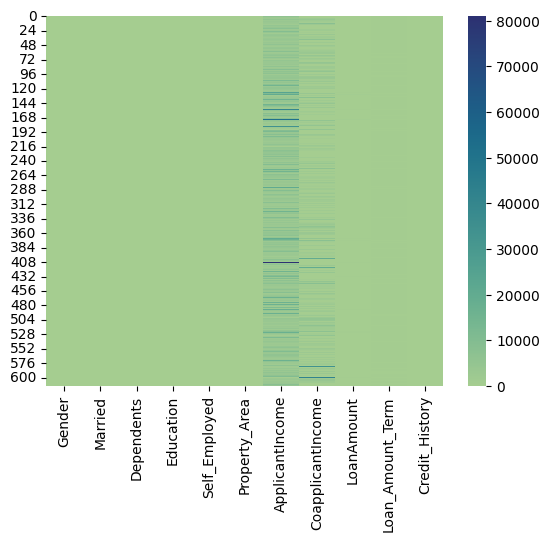

In [238]:
sns.heatmap(X,cmap="crest")

In [239]:
df.duplicated().any()

False

The percentage of Y class : 0.69
The percentage of N class : 0.31


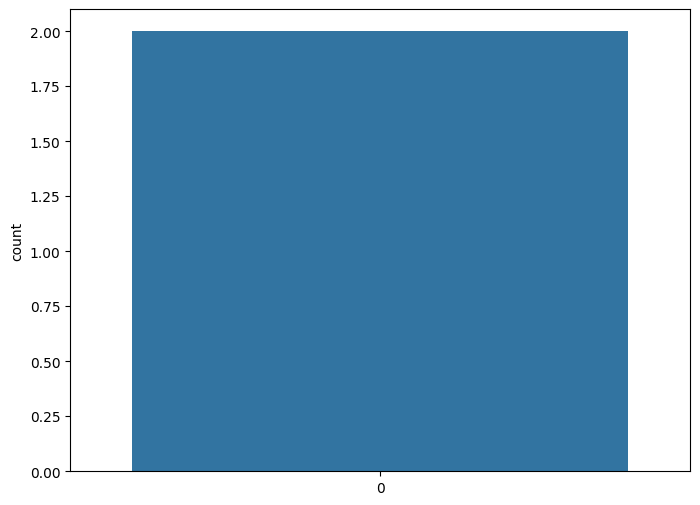

In [240]:
# let's look at the target percentage

plt.figure(figsize=(8,6))
sns.countplot(df['Loan_Status'].value_counts());

print('The percentage of Y class : %.2f' % (df['Loan_Status'].value_counts()[0] / len(df)))
print('The percentage of N class : %.2f' % (df['Loan_Status'].value_counts()[1] / len(df)))

c:\Users\choro\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


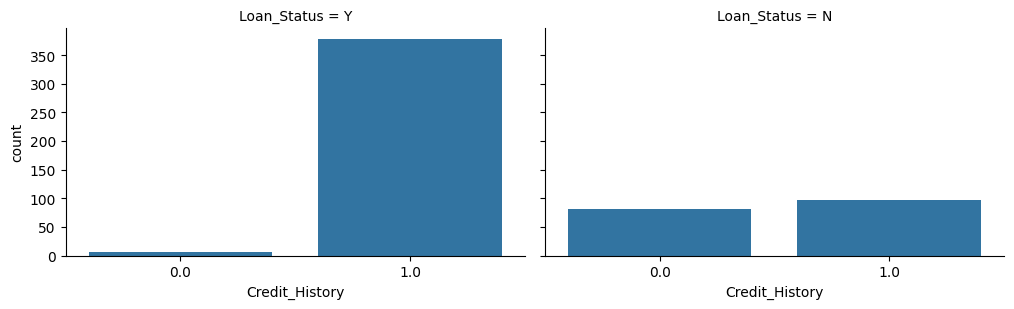

In [241]:
# on doit tester pour savoir quel variable a un impact sur l'accordation du crédit ou pas

grid = sns.FacetGrid(df, col="Loan_Status", height=3.2, aspect=1.6)
grid.map(sns.countplot,'Credit_History')


c:\Users\choro\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


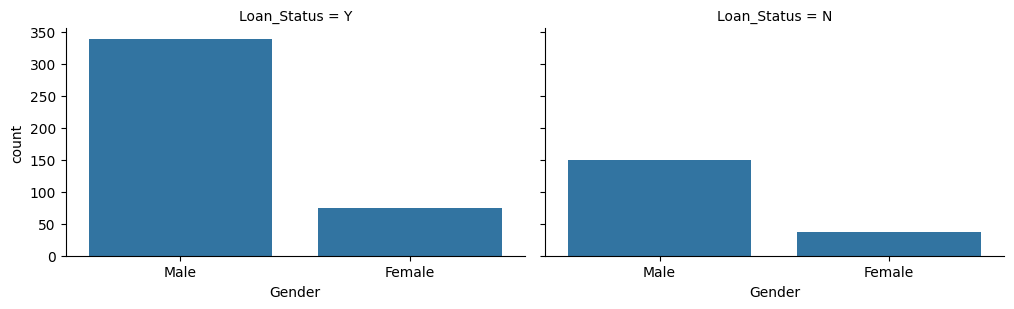

In [242]:
grid = sns.FacetGrid(df, col="Loan_Status", height=3.2, aspect=1.6)
grid.map(sns.countplot,'Gender') #fait le calcul pour chaque sous-grid

c:\Users\choro\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


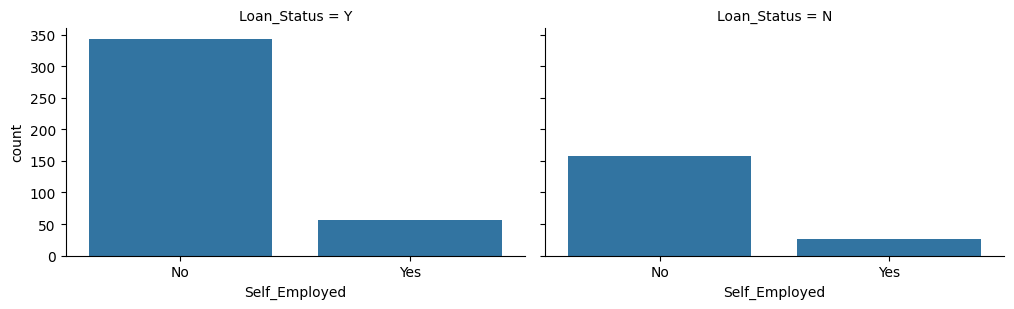

In [243]:
grid = sns.FacetGrid(df, col="Loan_Status", height=3.2, aspect=1.6)
grid.map(sns.countplot,'Self_Employed')

c:\Users\choro\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


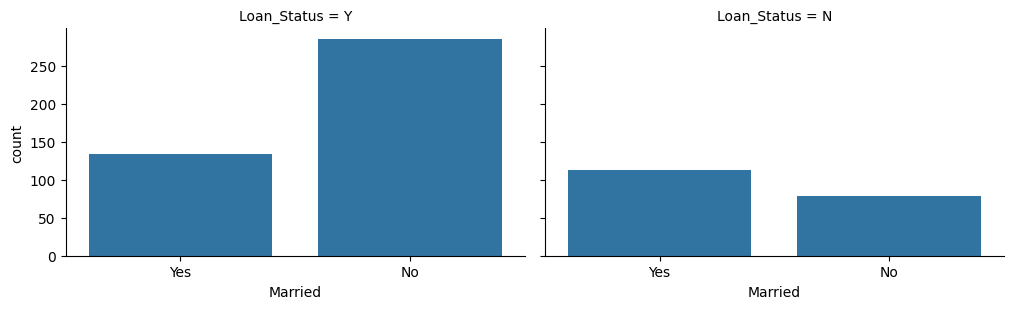

In [244]:
grid = sns.FacetGrid(df, col="Loan_Status", height=3.2, aspect=1.6)
grid.map(sns.countplot,'Married')

c:\Users\choro\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


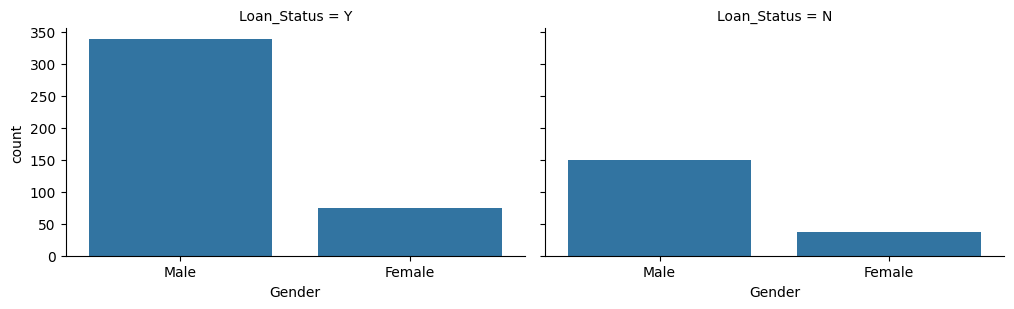

In [245]:
# Gender

grid = sns.FacetGrid(df, col="Loan_Status", height=3.2, aspect=1.6)
grid.map(sns.countplot,'Gender')

#les hommes déja demande plus que les femmes et on une forte probabilité d'avoir le crédit que les femmes 

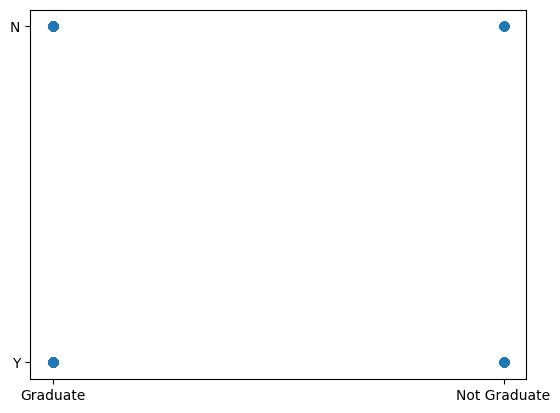

In [246]:
plt.scatter(df['Education'],df['Loan_Status'])
#donc y a aucun impact de l'education sur la désicion du crédit 

c:\Users\choro\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


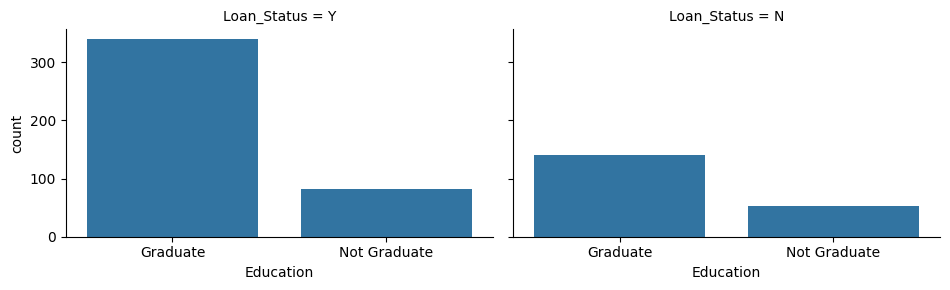

In [247]:
grid = sns.FacetGrid(df,col='Loan_Status', aspect=1.6)
grid.map(sns.countplot, 'Education')

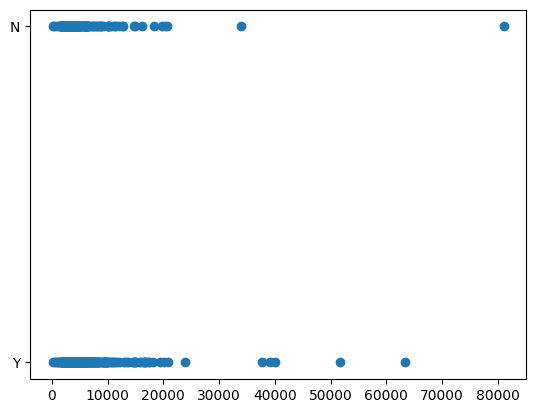

In [248]:
plt.scatter(df['ApplicantIncome'],df['Loan_Status'])
#aussi meme remarque 

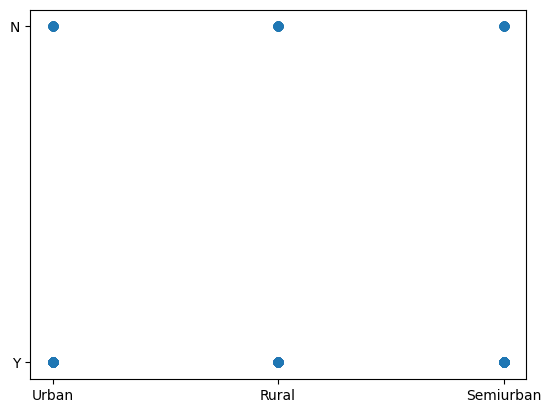

In [249]:
plt.scatter(df['Property_Area'],df['Loan_Status'])


In [250]:
df.groupby('Loan_Status').mean()

C:\Users\choro\AppData\Local\Temp\ipykernel_5388\1551016547.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Loan_Status').mean()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,5446.078125,1877.807292,151.220994,344.064516,0.541899
Y,5384.068720,1504.516398,144.294404,341.072464,0.981818


<Axes: xlabel='Dependents', ylabel='count'>

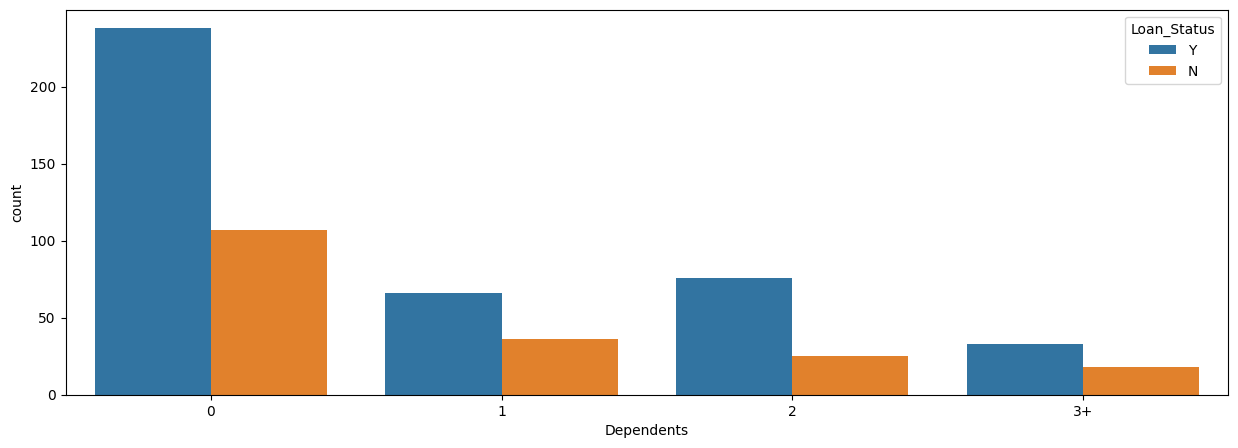

In [251]:
plt.figure(figsize=(15,5))
sns.countplot(x='Dependents', hue='Loan_Status', data=df)

#plus que la personne a plus de charge plus qu'il aura pas de crédit

<Axes: xlabel='Property_Area', ylabel='count'>

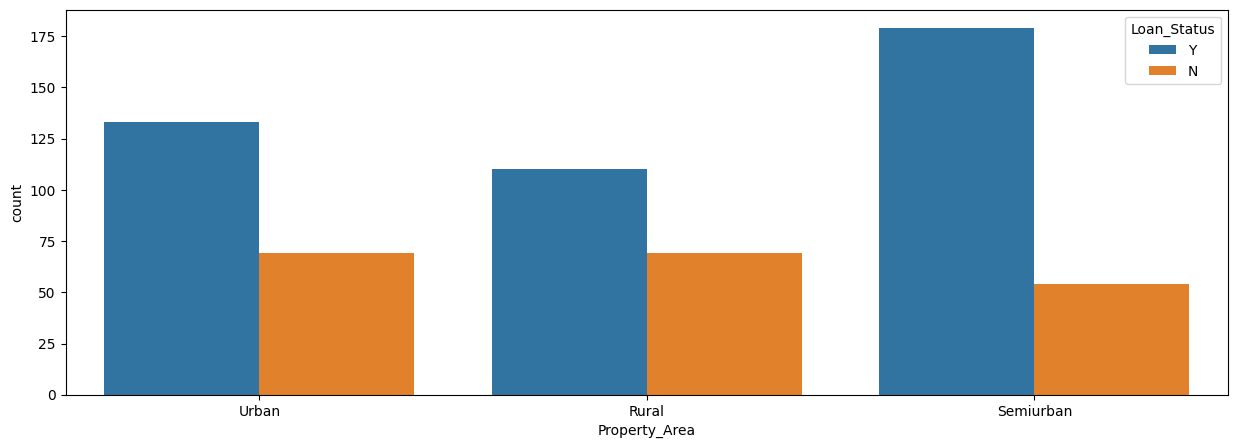

In [252]:
plt.figure(figsize=(15,5))
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)

# Traning Model

In [253]:
# Diviser les données en deux X_train X_test
# from sklearn.model_selection class qui permet de diviser les données aléatoirement 

In [254]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [257]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [265]:
model=StratifiedShuffleSplit (n_splits=1,test_size=0.2,random_state=42)

# Parcourez la division (il y aura une seule division)
for train , test in model.split(X,Y):
 
    X_train,X_test = X.iloc[train],X.iloc[test]
    Y_train,Y_test = Y.iloc[train],Y.iloc[test]

print("shape of X_train",X_train.shape)
print("shape of X_test",X_test.shape)
print("shape of Y_train",Y_train.shape)
print("shape of Y_test",Y_test.shape)

shape of X_train (491, 11)
shape of X_test (123, 11)
shape of Y_train (491,)
shape of Y_test (123,)


In [267]:
# Je vais utiliser 2 algorithme Logistic regression et Decisien Tree

In [274]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [283]:
# Créez une instance du modèle LogisticRegression
model_1 = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)
# Entraînez le modèle sur les données d'entraînement
model_1.fit(X_train, Y_train)
# Faites des prédictions sur les données de test
y_pred = model_1.predict(X_test)
print("coef model :",model_1.coef_,"\n")
from sklearn.metrics import accuracy_score, classification_report

# Calculez l'exactitude
accuracy = accuracy_score(Y_test, y_pred)
#accuracy = (Nombre de prédictions correctes) / (Nombre total de prédictions)

print("Exactitude :", accuracy)

# Affichez un rapport de classification
print(classification_report(Y_test, y_pred))


coef model : [[-2.70317437e-01  3.80829029e-01  9.64260926e-02 -4.44388228e-01
  -1.56034856e-01  2.91277469e-02 -7.57384016e-06 -6.47224105e-05
  -8.73340497e-04 -2.56697964e-03  2.57172505e+00]] 

Exactitude : 0.8536585365853658
              precision    recall  f1-score   support

           0       0.92      0.58      0.71        38
           1       0.84      0.98      0.90        85

    accuracy                           0.85       123
   macro avg       0.88      0.78      0.81       123
weighted avg       0.86      0.85      0.84       123



In [279]:
Y_test

150    0
559    1
598    1
235    1
145    1
      ..
363    1
280    0
7      0
289    1
373    0
Name: Loan_Status, Length: 123, dtype: int64

# Testing My model

In [280]:
# Supposons que "nouvelles_demandes" est un DataFrame contenant les caractéristiques des nouvelles demandes de crédit
custemers_informations =[[1,0,0,0,0,0,6277.0,0.0,118.0,360.0,0.0]] 
nouvelles_predictions = model_1.predict(custemers_informations)
print(nouvelles_predictions)

[0]


c:\Users\choro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Training Model using DecisionTree

In [285]:
model_2=DecisionTreeClassifier()
model_2.fit(X_train,Y_train)
y_pred_tree=model_2.predict(X_test)

In [286]:
# Calculez l'exactitude
accuracy_tree = accuracy_score(Y_test, y_pred_tree)
print("Exactitude :", accuracy_tree)

# Affichez un rapport de classification
print(classification_report(Y_test, y_pred_tree))

Exactitude : 0.6747967479674797
              precision    recall  f1-score   support

           0       0.48      0.55      0.51        38
           1       0.78      0.73      0.76        85

    accuracy                           0.67       123
   macro avg       0.63      0.64      0.63       123
weighted avg       0.69      0.67      0.68       123



In [287]:
custemers_informations =[[1,0,0,0,0,0,6277.0,0.0,118.0,360.0,0.0]] 
nouvelles_predictions = model_2.predict(custemers_informations)
print(nouvelles_predictions)

[0]


c:\Users\choro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
